In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

In [2]:
def bin_ps(y, nb=1000):
    x = np.arange(len(y))
    bins = np.arange(0, len(y), nb)
    inds = np.digitize(x, bins)
    
    bx = np.array([ np.mean(x[inds==i]) for i in range(2,np.max(inds))])
    by = np.array([ np.mean(y[inds==i]) for i in range(2,np.max(inds))])
    return bx, by

In [21]:
map_fac = 138414940.96010575

In [22]:
freq_str = ['30.0', '90.0', '148.0', '219.0', '277.0', '350.0']
freqs = [float(f) for f in freq_str]

In [23]:

maps = [hp.read_map(f'/tigress/zequnl/xgpaint/radio_wilman_{fr}.fits', verbose=False) * map_fac
        for fr in freq_str]
ps_auto = [hp.anafast(m1, iter=0) for m1 in maps]


In [24]:
monos = [hp.fit_monopole(m_) for m_ in maps]

Text(0, 0.5, 'monopole')

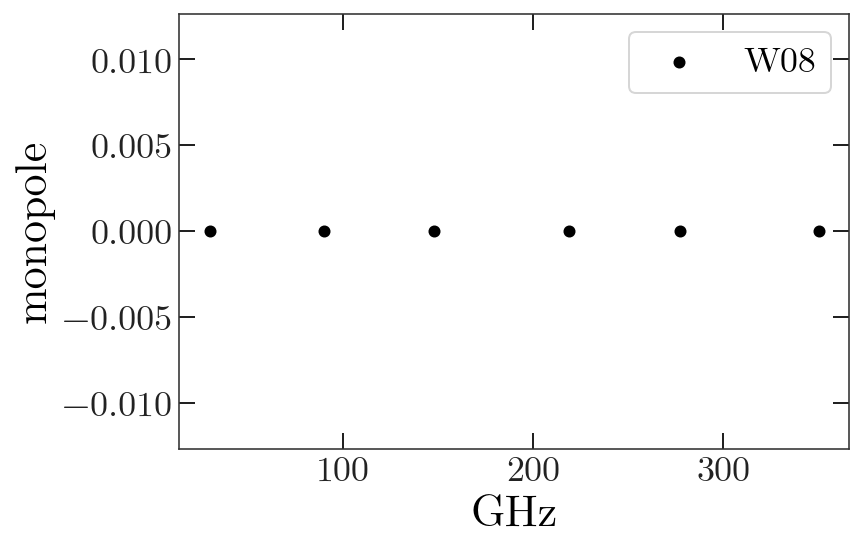

In [35]:
plt.scatter( freqs, np.array(monos), label='W08' )

plt.legend()
plt.xlabel('GHz')
plt.ylabel('monopole')
# plt.yscale('log')

In [9]:
sehgal_freq_str = ['030', '090', '148', '219', '277', '350']
sehgal_maps = [hp.read_map(
    f'/tigress/zequnl/xgpaint/sehgal/{freq}_rad_pts_healpix.fits', verbose=False)
              for freq in sehgal_freq_str]
sehgal_ps_autos = [hp.anafast(m1, iter=0) for m1 in sehgal_maps]

In [10]:
sehgal_monos = [hp.fit_monopole(m_) for m_ in sehgal_maps]

In [28]:
monos

[4.443023453336487e-06,
 1.851081066986413e-06,
 1.2592251075304113e-06,
 9.016734897795156e-07,
 7.617760886854213e-07,
 6.048781791667901e-07]

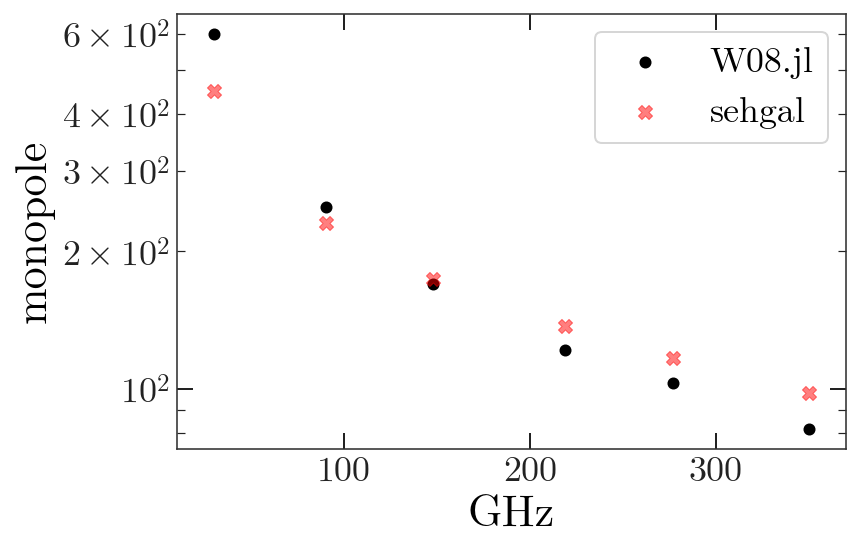

In [41]:
plt.scatter( freqs, np.array(monos) * 1.35e8, label='W08.jl' )
plt.scatter( freqs, sehgal_monos, marker='X', label='sehgal', lw=0.5, s=50, color='r', alpha=0.5 )

plt.legend()
plt.xlabel('GHz')
plt.ylabel('monopole')
plt.yscale('log')

plt.yscale('log')
# plt.ylim(1e-31, 1e-23)

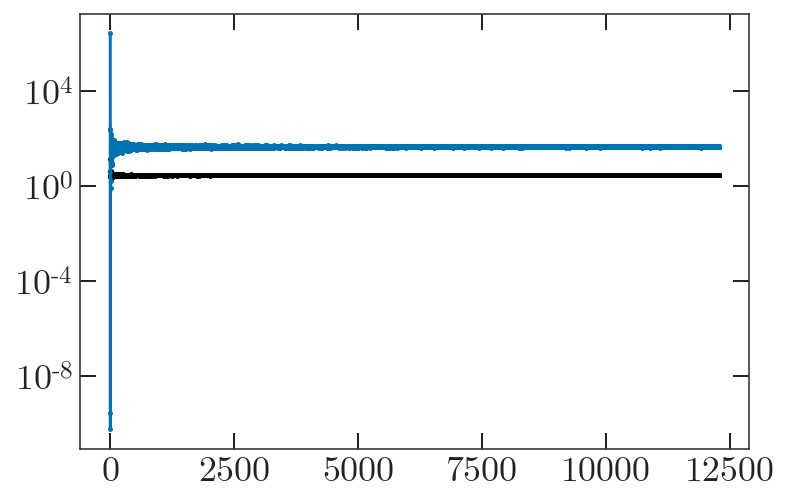

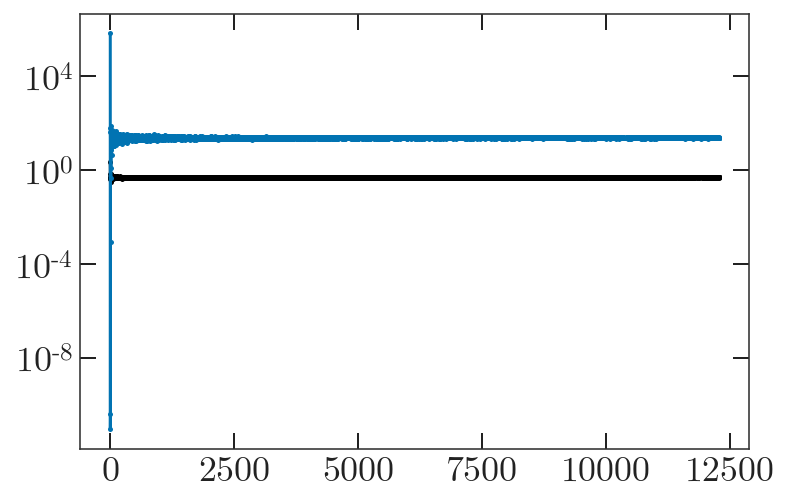

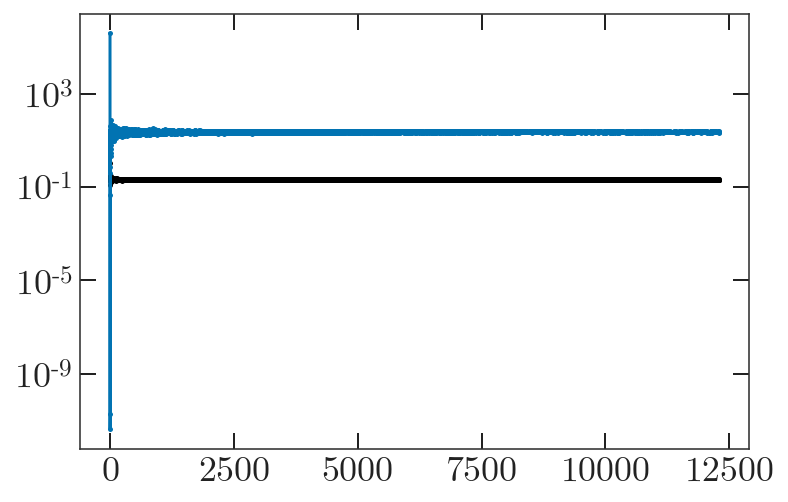

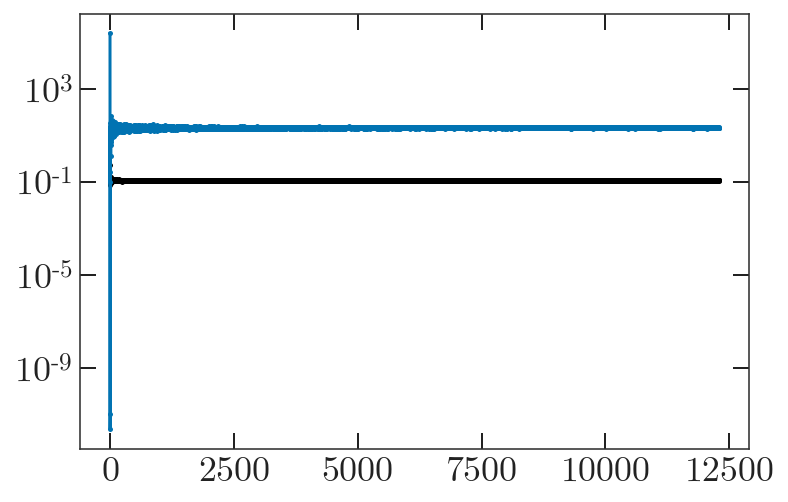

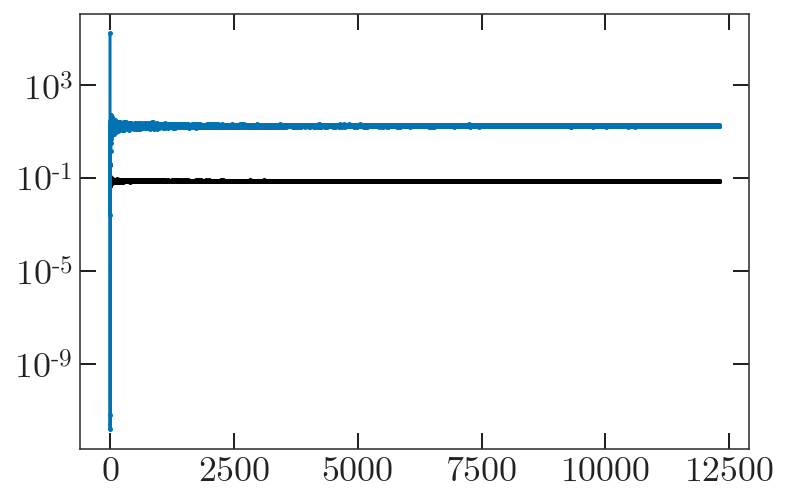

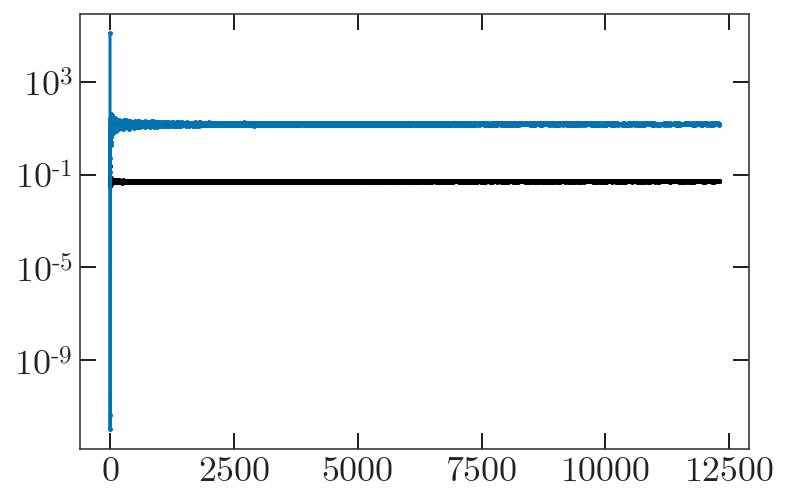

In [12]:
for ps1, ps2 in zip(ps_auto, sehgal_ps_autos):
    plt.figure()
    plt.plot(ps1 * 1e27)
    plt.plot(ps2)
    plt.yscale("log")

In [42]:
meds = np.array([np.median(ps_) for ps_ in ps_auto])
sehgal_meds = np.array([np.median(ps_) for ps_ in sehgal_ps_autos])

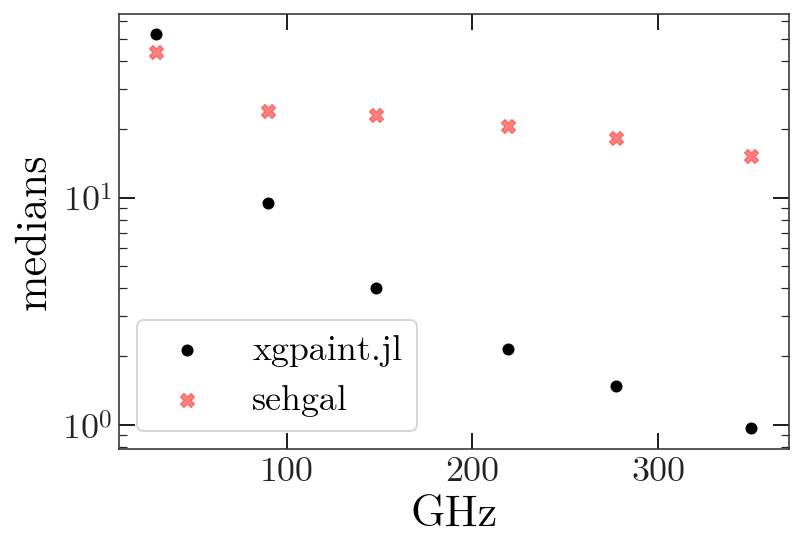

In [43]:
plt.scatter( freqs, np.array(meds) * 1e12, label='xgpaint.jl' )
plt.scatter( freqs, sehgal_meds, marker='X', label='sehgal', lw=0.5, s=50, color='r', alpha=0.5 )

plt.legend()
plt.xlabel('GHz')
plt.ylabel('medians')
plt.yscale('log')

# plt.yscale('log')
# plt.ylim(1e-31, 1e-23)

In [12]:
# freq_str = ['30.0', '143.0', '217.0', '353.0']
# freqs = [float(f) for f in freq_str]
# stoch_maps = [hp.read_map(f'/tigress/zequnl/xgpaint/radio_stoch_{fr}.fits', verbose=False) * map_fac_stoch
#         for fr in freq_str]
# stoch_ps_auto = [hp.anafast(m1, iter=0) for m1 in stoch_maps]
# stoch_monos = [ps_[0] for ps_ in stoch_ps_auto]

In [50]:
# plt.scatter( freqs, monos, label='xgpaint.jl' )
# plt.scatter( freqs, sehgal_monos, marker='X', label='sehgal', lw=0.5, s=50, color='r', alpha=0.5 )
# plt.scatter( freqs, stoch_monos, marker='v', label='stochastic $a_i$', lw=0.5, s=50, color='g', alpha=0.5 )

# plt.legend()
# plt.xlabel('GHz')
# plt.ylabel('monopole')
# plt.yscale('log')

# plt.yscale('log')
# # plt.ylim(1e-31, 1e-23)

In [32]:
map_fac = np.sqrt(sehgal_monos[1] / monos[1])
map_fac_stoch = np.sqrt(sehgal_monos[1] / stoch_monos[1])

In [45]:
'%.9e' % np.sqrt(sehgal_monos[1] / monos[1] * (3.309962479e+15)**2)

'2.001158454e+17'

In [31]:
np.mean(sehgal_maps[1]), np.mean(maps[1])

(0.29006705930787563, 0.29006705930787763)

In [61]:

str( '%.9e' % np.sqrt(np.median(sehgal_ps_autos[1] / ps_auto[2])))

'1.654023184e-02'

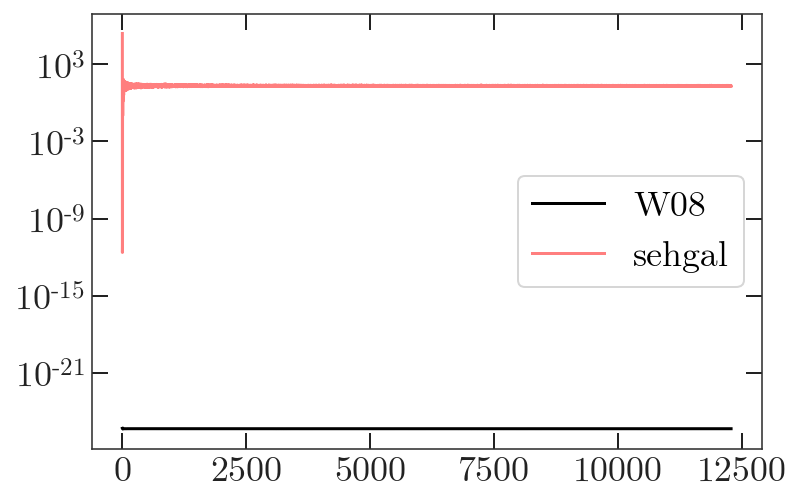

In [42]:
ell = np.arange(len(ps_auto[0]))
plt.plot(ps_auto[3], 'k-', label='W08')
# plt.plot(stoch_ps_auto[1], 'g-', alpha=0.5, label='stochastic $a_i$')
plt.plot(sehgal_ps_autos[3], 'r-', alpha=0.5, label='sehgal')
plt.yscale('log')
plt.legend()

Text(0, 0.5, '$C_{\\ell}$')

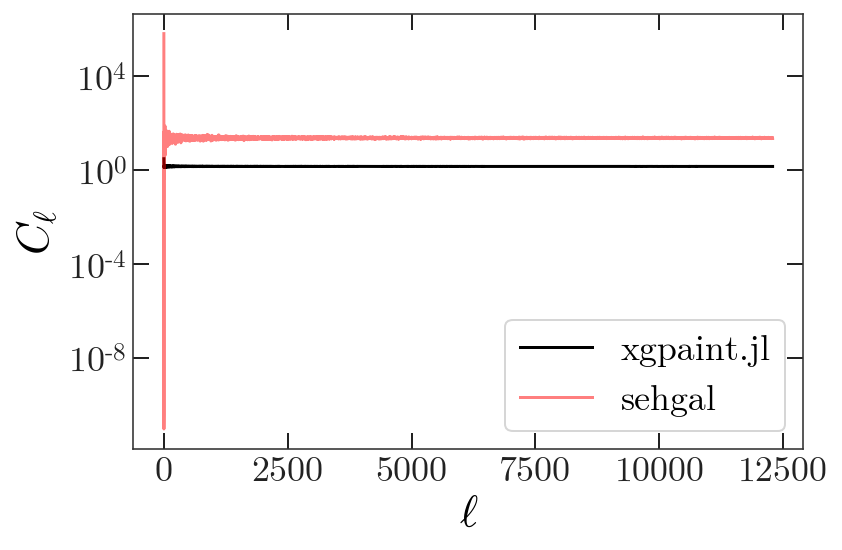

In [40]:

plt.plot(ps_auto[1] * 1e28, 'k-', label='xgpaint.jl')
# plt.plot(stoch_ps_auto[1], 'g-', alpha=0.5, label='stochastic $a_i$')
plt.plot(sehgal_ps_autos[1], 'r-', alpha=0.5, label='sehgal')
plt.yscale('log')
plt.legend()
# plt.ylim(1,1e2)
# plt.xlim(0,100)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')

Both at GHz doesn't work

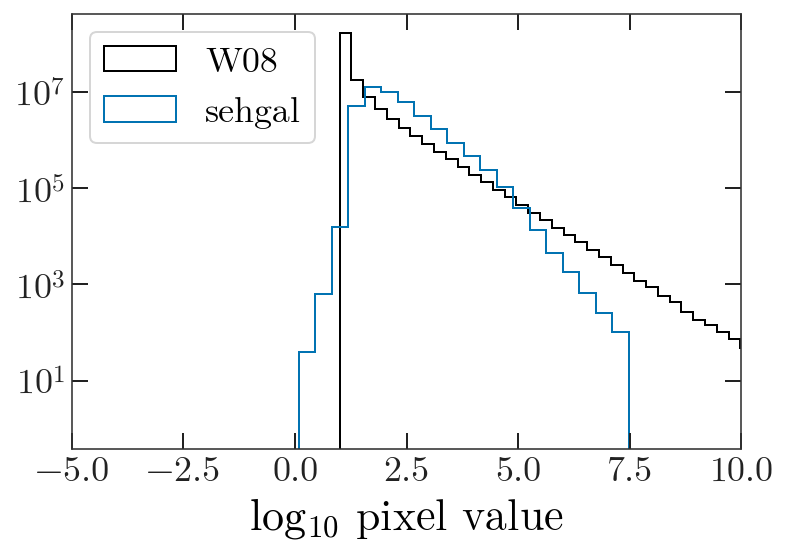

In [45]:
plt.hist( np.log10(maps[1] + 1e-11) + 12, bins=50, histtype='step', label='W08' )
plt.hist( np.log10(sehgal_maps[1] + 1e-11), bins=50, histtype='step', label='sehgal' )
plt.legend()
plt.xlim(-5, 10)
plt.xlabel('$\log_{10}$ pixel value')
plt.yscale('log')

In [ ]:
hp.read_map(
    f'/tigress/zequnl/xgpaint/sehgal/{freq}_rad_pts_healpix.fits', verbose=False)
              for freq in sehgal_freq_str